***Hyperparameter Tuning of USPORF:***
- n_estimators
- max_depth
- max_features

In [47]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets.samples_generator import make_blobs
from rerf.urerf import UnsupervisedRandomForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Generate toy dataset using make_blob function from sklearn**:  

Parameters:  
1) n_samples: 200 (# of samples in dataset spread evenly across n number of clusters clusters)  
2) centers: [15, 15], [0, 0], [-15, -15] (self selected centroids for each cluster)  
3) cluster_std = 3 (spread of data points within each cluster)  
3) random_state = 0 (arbitrary value set for reproducibility)

In [216]:
# 2D toy data
centers = [[15, 2], [0, 0], [-15, 0]]
X, labels_true = make_blobs(n_samples=300, n_features = 2,
                            centers=centers, cluster_std=3,
                            random_state=0)

# 3D toy data
centers_3D = [[15, 2,0], [0, 0,0], [-15, 0,0]]
X_3D, labels_true_3D = make_blobs(n_samples=200, n_features = 3,
                            centers=centers_3D, cluster_std=3,
                            random_state=0)

# 4D toy data
centers_4D = [[15, 2,0,0], [0, 0,0,0], [-15, 0,0,0]]

X_4D, labels_true_4D = make_blobs(n_samples=200, n_features = 4,
                            centers=centers_4D, cluster_std=3,
                            random_state=0)


***Visualize Simulated 2D Data***

Text(0, 0.5, 'y')

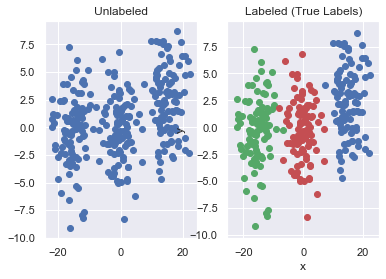

In [217]:
a = np.array(X)

# Visualize the toy data set without labels
plt.subplot(1,2,1)
plt.scatter(a[:,0],a[:,1],color = 'b')
plt.title('Unlabeled')

# Visualize the toy data set with labels
plt.subplot(1,2,2)
colors = ['b','r','g']
for k, label in zip(a,labels_true):
    plt.scatter(k[0],k[1], color = colors[label])
plt.title('Labeled (True Labels)')
plt.xlabel('x')
plt.ylabel('y')


***Visualize Simulated 3D Data***

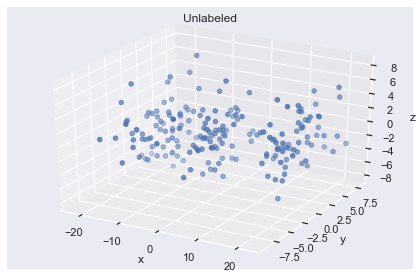

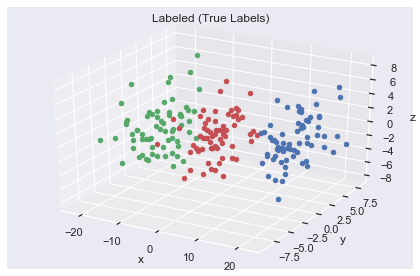

In [218]:
from mpl_toolkits.mplot3d import axes3d

b = np.array(X_3D)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(b[:,0], b[:,1], b[:,2], color = 'b')
plt.title('Unlabeled')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

plt.figure()
ax = plt.axes(projection='3d')
colors = ['b','r','g']
for k, label in zip(b,labels_true_3D):
    ax.scatter3D(k[0],k[1],k[2], color = colors[label])
plt.title('Labeled (True Labels)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

***Visualize Simulated 4D Data***

    feature1  feature2  feature3  feature4  labels
0  12.589771 -0.068649 -1.366598  0.052437  class0
1   2.081319 -0.478720 -0.401105  3.233231  class1
2 -14.359560 -3.625721 -0.726059  4.554784  class2
3  19.464757  7.687668  3.536339 -0.539775  class0
4 -15.784936 -0.546734 -0.608691 -0.329648  class2


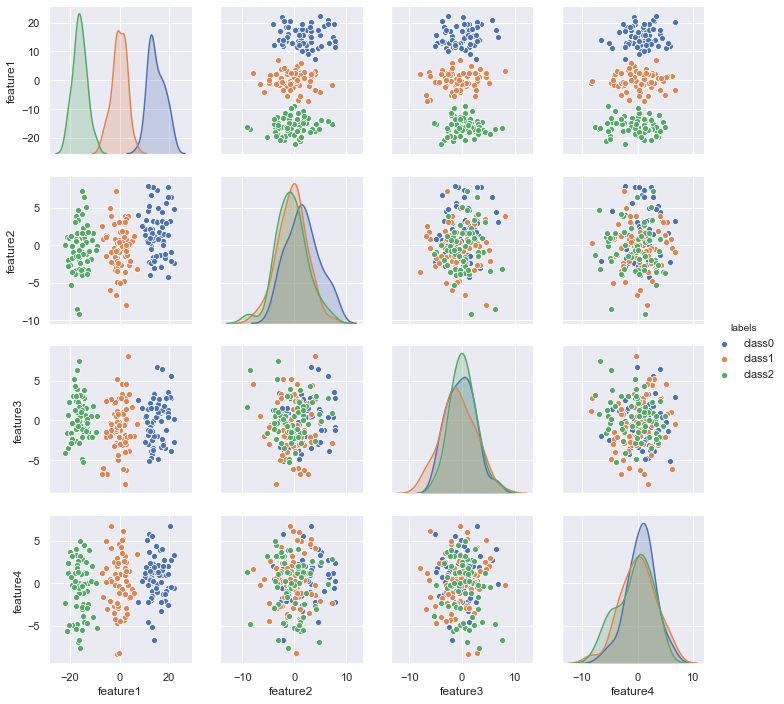

In [219]:
c = np.array(X_4D)
str_labels = []
for label in labels_true_4D:
    str_labels.append('class' + str(label))

data = {'feature1':c[:,0], 'feature2':c[:,1],
        'feature3':c[:,2], 'feature4':c[:,3],
        'labels': str_labels}

df = pd.DataFrame(data)
print(df.head())

g = sns.pairplot(df, hue="labels")

**Visualize Similarity and Dissimilarity Matrices Outputted by USPORF with default parameters**

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


Text(0.5, 1.0, 'Similarity Matrix for 2D Data')

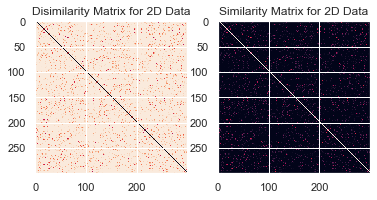

In [149]:
clf = UnsupervisedRandomForest(projection_matrix="RerF",
                               random_state=0)

clf.fit(X)
print(clf)

sim_mat = clf.transform()
dist_mat = 1 - sim_mat

plt.subplot(1,2,1);
plt.imshow(dist_mat)
plt.title('Disimilarity Matrix for 2D Data')
plt.subplot(1,2,2);
plt.imshow(sim_mat)
plt.title('Similarity Matrix for 2D Data')

In [150]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  affinity="precomputed",
                                  linkage="average")
predict_labels = cluster.fit_predict(1-sim_mat)
ave_score = adjusted_rand_score(labels_true, predict_labels)
print(ave_score)

0.9605467603426407


**Running multiple trials with default parameters**

In [120]:
def visualize_trial_run(data_in, labels_true):
    num_trials = 100;

    ave_scores = []

    for i in range(num_trials):
        print(i)

        # Obtain similarity matrix from USPORF classifier
        clf = UnsupervisedRandomForest(projection_matrix="RerF",
                                       random_state=0)

        clf.fit(data_in)
        sim_mat = clf.transform()

        # Cluster on the output of USPORF using Agglomerative Clustering
        cluster = AgglomerativeClustering(n_clusters=3, 
                                          affinity="precomputed",
                                          linkage="average")

        predict_labels = cluster.fit_predict(1-sim_mat)
        ave_score = adjusted_rand_score(labels_true, predict_labels)
        ave_scores.append(ave_score)
    return ave_scores

In [121]:
ave_2D_scores = visualize_trial_run(X,labels_true)
ave_3D_scores = visualize_trial_run(X_3D,labels_true_3D)
ave_4D_scores = visualize_trial_run(X_4D,labels_true_4D)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


KeyboardInterrupt: 

**Plot Histogram of the ARI scores with n_estimaters = 100**

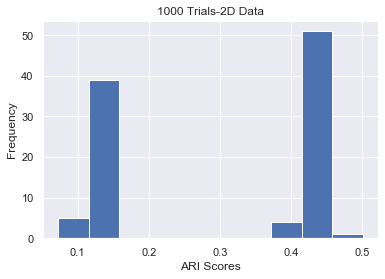

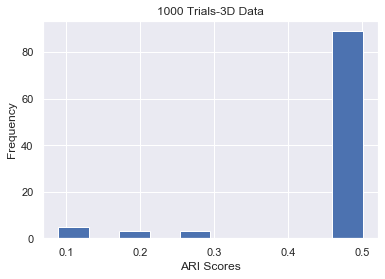

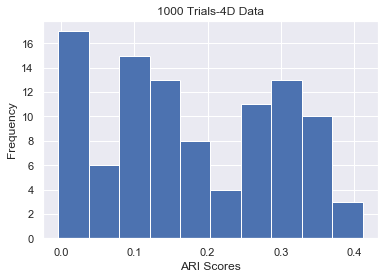

In [36]:
n_bins = 10
scores = [ave_2D_scores,ave_3D_scores,ave_4D_scores]
titles = ['1000 Trials-2D Data', '1000 Trials-3D Data', '1000 Trials-4D Data']
for i in range(len(scores)):
    plt.figure()
    plt.hist(scores[i], n_bins)
    plt.title(titles[i])
    plt.ylabel('Frequency')
    plt.xlabel('ARI Scores')

In [205]:
def visualize_tree_effect(data_in, labels_true):
    
    trees = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400, 1000, 2000]
#              600, 800, 1200, 1600, 2000, 5000, 7500, 10000]

    num_trials = 100;
    import pandas as pd

    dataObj = pd.DataFrame()
    tree_list = []
    ari_scores = []

    for i in range(len(trees)):
        print(trees[i])
        for t in range(num_trials):

            # Obtain similarity matrix from USPORF classifier
            clf = UnsupervisedRandomForest(n_estimators = trees[i],
                                           projection_matrix="RerF",
                                           random_state=0)

            clf.fit(data_in)
            sim_mat = clf.transform()

            # Cluster on the output of USPORF using Agglomerative Clustering
            cluster = AgglomerativeClustering(n_clusters=3, 
                                              affinity="precomputed",
                                              linkage="average")

            # Get predicted labels using agglomerative clustering
            predict_labels = cluster.fit_predict(1-sim_mat)

            # Evaluate USPORF & Agglomerative Clustering as classifier
            ari_score = adjusted_rand_score(labels_true, predict_labels)

            # Save tree information and associated ARI score
            tree_list.append(trees[i])
            ari_scores.append(ari_score)

    dataObj['Number of Trees'] = tree_list
    dataObj['ARI Scores'] = ari_scores

    return dataObj

In [206]:
%%time
dataObj_2D = visualize_tree_effect(X, labels_true)

1
2
4
8
16
32
64
100
200
400
1000
2000
CPU times: user 10min 28s, sys: 3.48 s, total: 10min 32s
Wall time: 10min 34s


In [213]:
%%time
dataObj_3D = visualize_tree_effect(X_3D, labels_true_3D)


1
2
4
8
16
32
64
100
200
400
1000
2000
CPU times: user 6min 23s, sys: 2.55 s, total: 6min 25s
Wall time: 6min 27s


In [220]:
%%time
dataObj_4D = visualize_tree_effect(X_4D, labels_true_4D)

1
2
4
8
16
32
64
100
200
400
1000
2000
CPU times: user 8min 22s, sys: 3.07 s, total: 8min 25s
Wall time: 8min 27s


Text(0.5, 1.0, 'Varying Number of Trees for 2D Data')

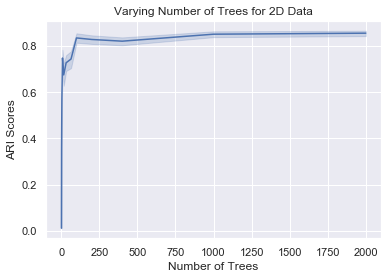

In [207]:
plt.figure()
sns.lineplot(x='Number of Trees', y='ARI Scores',data = dataObj_2D, ci = 95)
plt.title('Varying Number of Trees for 2D Data')

CPU times: user 356 ms, sys: 38.2 ms, total: 394 ms
Wall time: 443 ms


Text(0.5, 1.0, 'Varying Number of Trees for 3D Data')

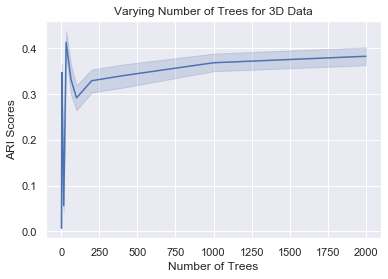

In [214]:
%%time
plt.figure()
sns.lineplot(x='Number of Trees', y='ARI Scores',data = dataObj_3D, ci = 95)
plt.title('Varying Number of Trees for 3D Data')

CPU times: user 347 ms, sys: 30.5 ms, total: 377 ms
Wall time: 382 ms


Text(0.5, 1.0, 'Varying Number of Trees for 4D Data')

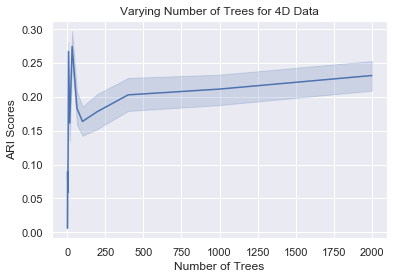

In [221]:
%%time
plt.figure()
sns.lineplot(x='Number of Trees', y='ARI Scores',data = dataObj_4D, ci = 95)
plt.title('Varying Number of Trees for 4D Data')


**Changing the depth of a tree:**  
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data.

In [354]:
num_trials = 100;

ave_scores = []

for i in range(num_trials):

    # Obtain similarity matrix from USPORF classifier
    clf = UnsupervisedRandomForest(max_depth = 32,
                                   projection_matrix="RerF",
                                   random_state=0)

    clf.fit(X)
    sim_mat = clf.transform()
    
    # Cluster on the output of USPORF using Agglomerative Clustering
    cluster = AgglomerativeClustering(n_clusters=3, 
                                      affinity="precomputed",
                                      linkage="average")
    
    predict_labels = cluster.fit_predict(1-sim_mat)
    ave_score = adjusted_rand_score(labels_true, predict_labels)
    ave_scores.append(ave_score)

Text(0.5, 0, 'ARI Scores')

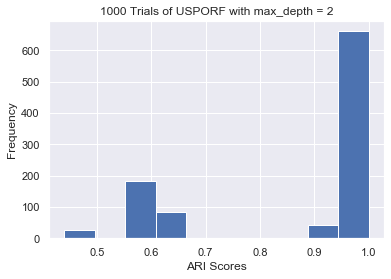

In [355]:
n_bins = 10
plt.hist(ave_scores,n_bins)
plt.title('1000 Trials of USPORF with max_depth = 32')
plt.ylabel('Frequency')
plt.xlabel('ARI Scores')

In [233]:
def visualize_depth_effect(data_in, labels_true):
    depth = 26
    num_trials = 25

    dataObj = pd.DataFrame()
    depth_list = []
    ari_scores = []

    for i in range(1,depth):
        print(i)
        for t in range(num_trials):
            print(t)
            # Obtain similarity matrix from USPORF classifier
            clf = UnsupervisedRandomForest(max_depth = i,
                                           projection_matrix="RerF",
                                           random_state=0)

            clf.fit(data_in)
            sim_mat = clf.transform()

            # Cluster on the output of USPORF using Agglomerative Clustering
            cluster = AgglomerativeClustering(n_clusters=3, 
                                              affinity="precomputed",
                                              linkage="average")

            # Get predicted labels using agglomerative clustering
            predict_labels = cluster.fit_predict(1-sim_mat)

            # Evaluate USPORF & Agglomerative Clustering as classifier
            ari_score = adjusted_rand_score(labels_true, predict_labels)

            # Save tree information and associated ARI score
            depth_list.append(i)
            ari_scores.append(ari_score)

    dataObj['Max Depth'] = depth_list
    dataObj['ARI Scores'] = ari_scores
    
    return dataObj

In [234]:
dataObj_2D = visualize_depth_effect(X,labels_true)

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
2

     Max Depth  ARI Scores
0            1    0.400927
1            1    0.160941
2            1    0.160941
3            1    0.400927
4            1    0.207682
..         ...         ...
620         25    0.979917
621         25    0.979917
622         25    0.979917
623         25    0.772876
624         25    0.970050

[625 rows x 2 columns]


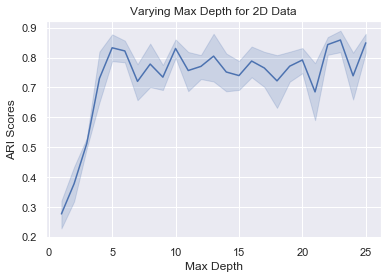

In [238]:
sns.lineplot(x='Max Depth', y='ARI Scores',data = dataObj_2D)
plt.title('Varying Max Depth for 2D Data')
print(dataObj_2D)

In [240]:
%%time
dataObj_3D = visualize_depth_effect(X_3D,labels_true_3D)

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
2

     Max Depth  ARI Scores
0            1    0.476481
1            1    0.034417
2            1    0.034417
3            1    0.476481
4            1    0.165701
..         ...         ...
620         25    0.401160
621         25    0.457693
622         25    0.100743
623         25    0.387691
624         25    0.116953

[625 rows x 2 columns]


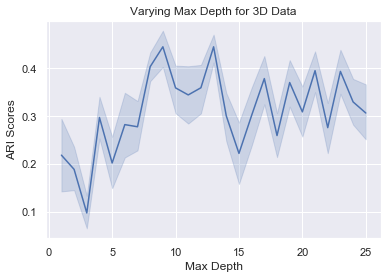

In [241]:
sns.lineplot(x='Max Depth', y='ARI Scores',data = dataObj_3D)
plt.title('Varying Max Depth for 3D Data')
print(dataObj_3D)

In [242]:
%%time
dataObj_4D = visualize_depth_effect(X_4D,labels_true_4D)

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
2

     Max Depth  ARI Scores
0            1    0.122150
1            1   -0.002902
2            1   -0.002902
3            1   -0.002902
4            1    0.004895
..         ...         ...
620         25    0.103835
621         25    0.106374
622         25    0.228844
623         25    0.174817
624         25    0.054581

[625 rows x 2 columns]


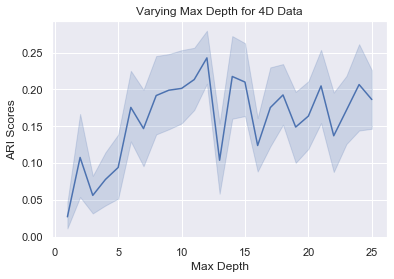

In [243]:
sns.lineplot(x='Max Depth', y='ARI Scores',data = dataObj_4D)
plt.title('Varying Max Depth for 4D Data')
print(dataObj_4D)

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split

In [371]:
num_trials = 1000;

ave_scores = []

for i in range(num_trials):

    # Obtain similarity matrix from USPORF classifier
    clf = UnsupervisedRandomForest(max_features = 2,
                                   projection_matrix="RerF",
                                   random_state=0)

    clf.fit(X)
    sim_mat = clf.transform()
    
    # Cluster on the output of USPORF using Agglomerative Clustering
    cluster = AgglomerativeClustering(n_clusters=3, 
                                      affinity="precomputed",
                                      linkage="single")
    
    predict_labels = cluster.fit_predict(1-sim_mat)
    ave_score = adjusted_rand_score(labels_true, predict_labels)
    ave_scores.append(ave_score)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features=0.5, min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


Text(0.5, 0, 'ARI Scores')

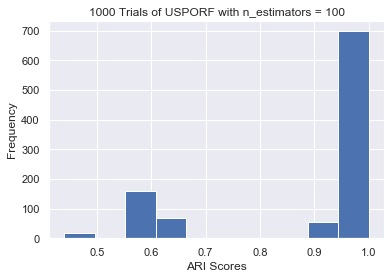

In [372]:
n_bins = 10
plt.hist(ave_scores,n_bins)
plt.title('1000 Trials of USPORF with max_features = 2')
plt.ylabel('Frequency')
plt.xlabel('ARI Scores')

In [375]:
n_features = 3
num_trials = 100

dataObj = pd.DataFrame()
feature_list = np.ones((n_features-1)*num_trials)
ari_scores = np.ones((n_features-1)*num_trials)

count = 0
for i in range(1,n_features):
    print(i)
    for t in range(num_trials):
        # Obtain similarity matrix from USPORF classifier
        clf = UnsupervisedRandomForest(max_features = i,
                                       projection_matrix="RerF",
                                       random_state=0)

        clf.fit(X)
        sim_mat = clf.transform()

        # Cluster on the output of USPORF using Agglomerative Clustering
        cluster = AgglomerativeClustering(n_clusters=3, 
                                          affinity="precomputed",
                                          linkage="single")

        # Get predicted labels using agglomerative clustering
        predict_labels = cluster.fit_predict(1-sim_mat)
        
        # Evaluate USPORF & Agglomerative Clustering as classifier
        ari_score = adjusted_rand_score(labels_true, predict_labels)
        
        # Save tree information and associated ARI score
        feature_list[count]=i
        ari_scores[count]=ari_score
        count += 1

dataObj['Max Features'] = feature_list
dataObj['ARI Scores'] = ari_scores

1
2


     Max Features  ARI Scores
0             1.0    0.566873
1             1.0    0.556865
2             1.0    0.984887
3             1.0    0.630146
4             1.0    0.556865
..            ...         ...
195           2.0    1.000000
196           2.0    1.000000
197           2.0    1.000000
198           2.0    1.000000
199           2.0    1.000000

[200 rows x 2 columns]


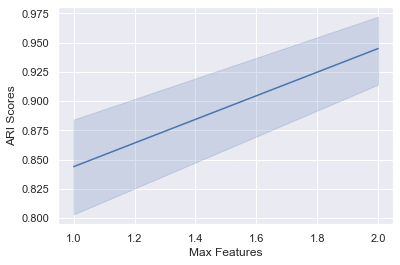

In [376]:
sns.lineplot(x='Max Features', y='ARI Scores',data = dataObj)
print(dataObj)